# Exercise
Implement mini batch gradient descent in python and plot cost vs epoch graph. Mini batch is intermediate version of batch GD and stochastic GD. In stochastic we used one randomly picked training sample, In mini gradient descent you will use a batch of samples in each iterations. For example if you have total 50 training samples, you can take a batch of 10 samples, calculate cumulitive error for those 10 samples and then adjust weights. In SGD we adjust weights after every one sample. In Batch we adjust weights after going through all samples but in mini batch we do after every m samples (where m is batch size and it is 0 < m < n, where n is total number of samples

### `Mini Batch Gradient Descent`

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('homeprices_banglore.csv')
df.sample(5)

,area,bedrooms,price
1,2600,4,120.0
11,2785,4,140.0
12,1000,2,38.0
18,2770,3,102.0
10,1800,3,82.0


In [30]:
df.shape

(20, 3)

In [31]:
from sklearn.preprocessing import MinMaxScaler

sx = MinMaxScaler()
sy = MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis =1))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))

In [32]:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [33]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D

In [34]:
scaled_y.reshape(20, )

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [35]:
np.random.permutation(10)

array([4, 1, 8, 9, 2, 3, 5, 6, 7, 0])

In [36]:
np.random.choice(10, 10)

array([4, 9, 4, 4, 9, 6, 1, 6, 0, 7])

In [37]:
def mini_batch_gradient_descent(X, y_true, epochs=100, batch_size=5, learning_rate=0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    if batch_size > total_samples:
        batch_size = total_samples

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices] # Shuffled versions of X and y_true
        y_tmp = y_true[random_indices]

        for j in range(0, total_samples, batch_size):
            Xj = X_tmp[j:j+batch_size] # Mini batch of data
            yj = y_tmp[j:j+batch_size]
            y_pred = np.dot(w, Xj.T) + b

            w_grad = -(2 / len(Xj)) * (Xj.T.dot(yj - y_pred))
            b_grad = -(2 / len(Xj)) * np.sum(yj - y_pred)

            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad

            cost =np.mean(np.square(yj - y_pred))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

In [39]:
w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(scaled_X, 
                                                                scaled_y.reshape(scaled_y.shape[0],), 
                                                                epochs = 100, 
                                                                batch_size = 5)
w, b, cost


(array([0.72452612, 0.69430516]), -0.24776096498221517, 0.010293747141350267)

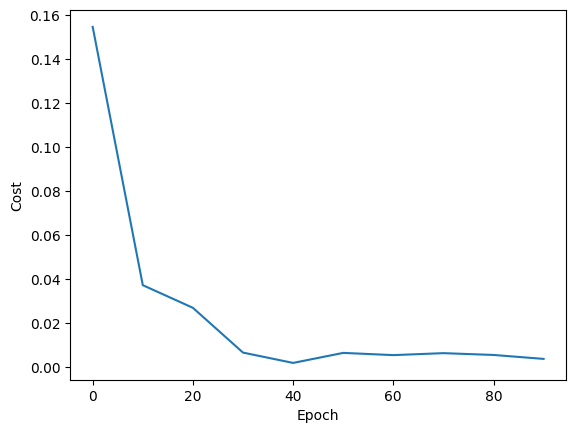

In [42]:
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.plot(epoch_list, cost_list)

In [40]:
def predict(area, bedrooms, w, b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])

In [41]:
predict(2000, 3, w, b)

/Users/fareed/miniconda3/envs/dl_env/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[85.89139621]])

In [43]:
predict(3000, 5, w, b)

/Users/fareed/miniconda3/envs/dl_env/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[166.48493469]])